# MNIST Digit recognition

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/grid_search.html#grid-search


In [1]:
%run utils.py

## Get the data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Explore Data

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Showing  3


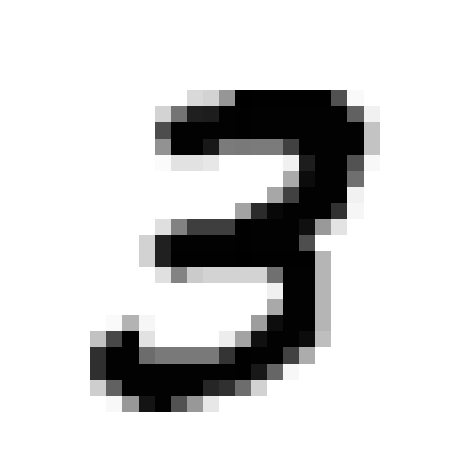

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[7]
print("Showing ", y[7])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

image = Images(".")
image.save_fig("some_digit_plot")
plt.show()

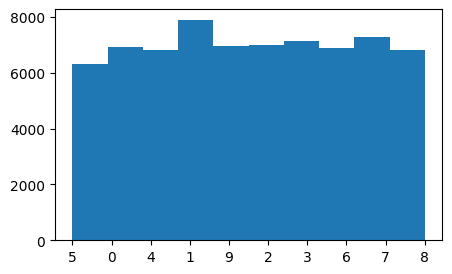

In [7]:
fig, ax = plt.subplots(1, figsize=(5,3))
plt_obj = plt.hist(y)

## Separate Train and Test Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [10]:
X_train.shape, y_train.shape

((56000, 784), (56000,))

## Train Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
classifier = KNeighborsClassifier(n_jobs=8)

In [13]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=8)

In [14]:
classifier.score(X_train, y_train)

0.9808392857142857

In [15]:
y_hat = classifier.predict(X_test)

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

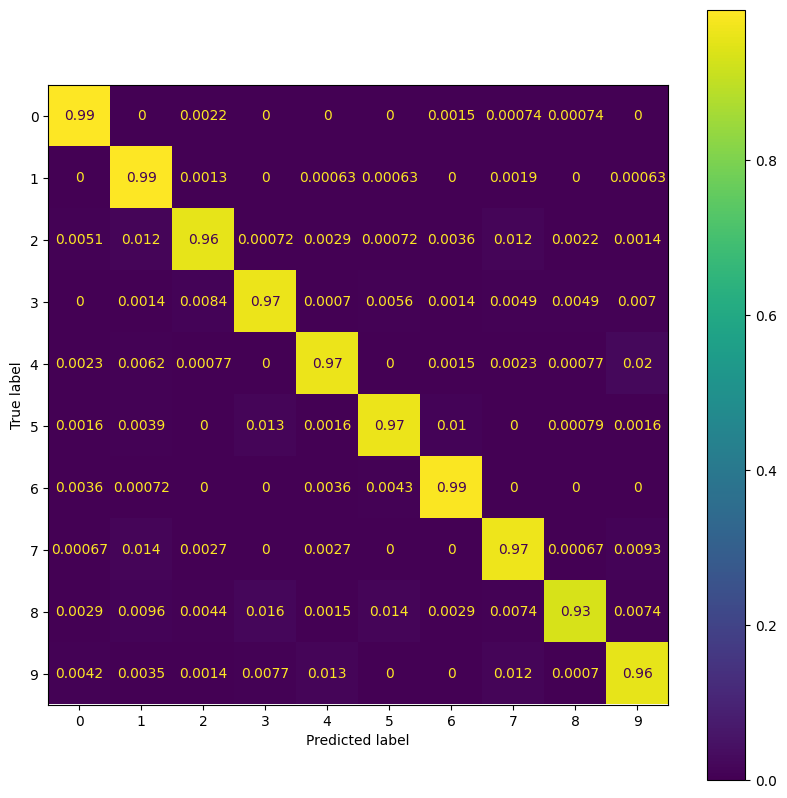

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, normalize="true", ax=ax)

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy", n_jobs=5) 

In [20]:
print("Mean accuracy", scores.mean())
print("Accuracy std", scores.std())

Mean accuracy 0.9687678571428572
Accuracy std 0.001651568518538815


## Hyperparameters tunning

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors":[2, 3, 4, 5], "weights":["distance", "uniform"]}
clf = GridSearchCV(classifier, parameters, cv=5, verbose=3)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  23.3s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.972 total time=  22.9s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.972 total time=  23.1s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  22.9s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=  23.2s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=  23.3s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.965 total time=  24.2s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.965 total time=  26.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=  24.3s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.961 total time=  24.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  26.1s
[CV 2/5] END ...n_neighbors=3, weights=distance;,

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [22]:
len(y_test)

14000

In [23]:
clf.cv_results_["mean_test_score"]

array([0.969875  , 0.96333929, 0.97133929, 0.97005357, 0.97219643,
       0.968375  , 0.97007143, 0.96876786])

In [24]:
import pandas as pd

In [25]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110240,0.005339,22.970727,0.146927,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.969018,0.971518,0.971696,0.969018,0.968125,0.969875,0.001452,5
1,0.109796,0.001714,24.332653,0.848489,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.961518,0.965357,0.964821,0.963661,0.961339,0.963339,0.001655,8
2,0.112484,0.005857,25.520868,0.439555,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.970982,0.970357,0.972500,0.972054,0.970804,0.971339,0.000805,2
3,0.112446,0.001996,26.477226,0.940632,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.968929,0.969375,0.971518,0.970893,0.969554,0.970054,0.000982,4
4,0.109085,0.002329,24.989576,0.946858,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.971339,0.972857,0.973304,0.972232,0.971250,0.972196,0.000812,1
5,0.110979,0.001800,25.016513,0.387784,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.966964,0.969554,0.969196,0.969196,0.966964,0.968375,0.001159,7
6,0.111430,0.006338,25.037324,0.444914,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.968214,0.971161,0.973214,0.969821,0.967946,0.970071,0.001954,3
7,0.115823,0.004203,25.635382,0.462392,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.967054,0.969464,0.971518,0.968661,0.967143,0.968768,0.001652,6


In [27]:
best = clf.best_estimator_

In [30]:
y_pred = best.predict(X_test)

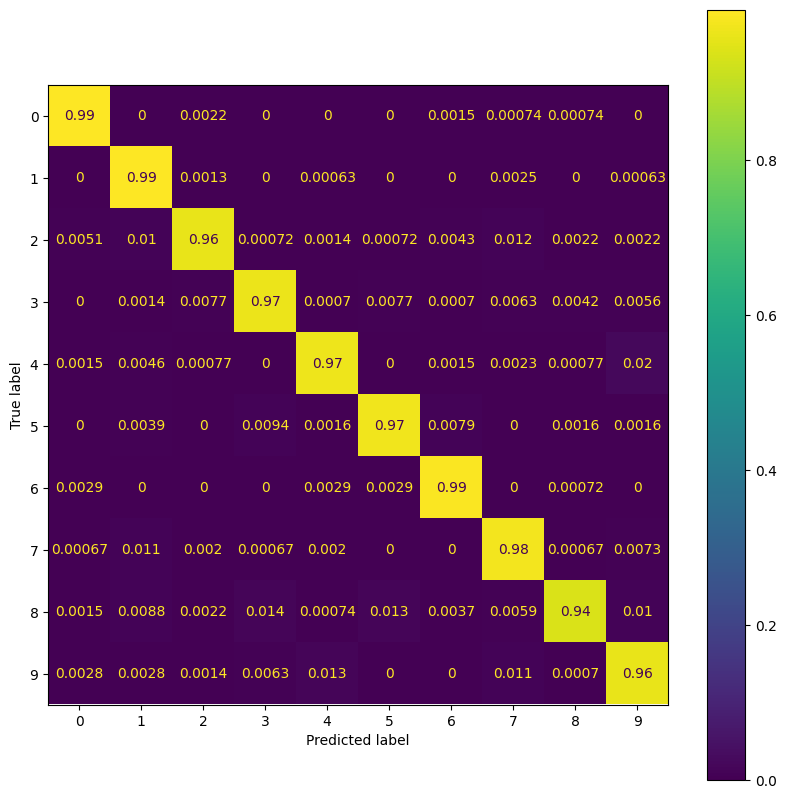

In [31]:
fig, ax = plt.subplots(1, figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", ax=ax)

## Retrain with Augmented Data

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser="auto")

In [ ]:
%run utils.py

In [ ]:
new_digits, new_targets = shift_digits(mnist)
mnist.data = np.append(mnist.data, np.array(new_digits), axis=0)
mnist.target = np.append(mnist.target, np.array(new_targets), axis=0)

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [33]:
best.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=8, n_neighbors=4, weights='distance')

In [34]:
best.score(X_test, y_test)

0.9731428571428572

In [35]:
y_pred = best.predict(X_test)

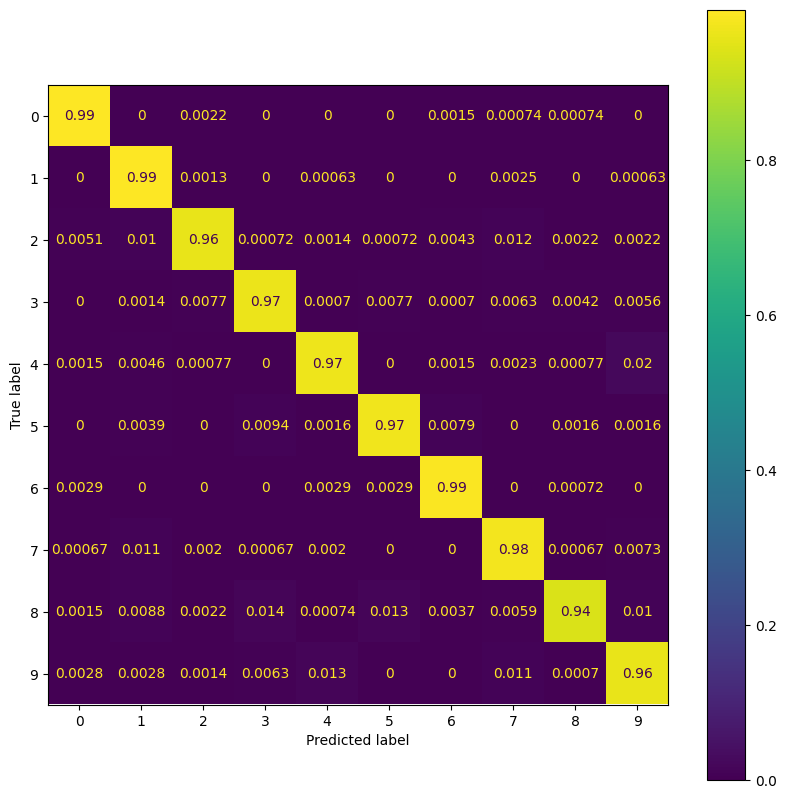

In [36]:
fig, ax = plt.subplots(1, figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", ax=ax)